# Install diffusers

In [1]:
!pip install diffusers transformers accelerate --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 100.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.4/336.4 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 81.2 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.0
    Uninstalling tokenizers-0.20.0:
      Successfully uninstalled tokenizers-0.20.0
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.34.2
    Uninstalling accelerate-0.34.2:
      Successfully uninstalled accelerate-0.34.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.45.1
    Uninstalling transformers-4.45.1:
      Successfully uninstalled transformers-4.45.1


# Imports

In [2]:
import numpy as np
import os
from tqdm import tqdm
import PIL
import cv2
import os
import numpy as np
import torch
from diffusers import DiffusionPipeline
from tqdm import tqdm
import pickle
import time

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

# Set the image files and the prompt file path

In [3]:
promptFilePath = '/kaggle/input/jpprompts/prompts.txt'

promptList = []

with open(promptFilePath, "r") as file:
    for line in file:
        promptList.append(line.strip())

print('total prompts: ', len(promptList))

total prompts:  200


# Setup image generation pipeline

In [4]:
from diffusers import AutoPipelineForText2Image
import torch

width = 1024
height = 1024

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.32.1",
  "_name_or_path": "stabilityai/sdxl-turbo",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerAncestralDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

# Generate images

In [5]:
timeList = []
imageListOne = []
imageListTwo = []

testCounter = 0

import gc

gc.collect()


for i in tqdm(range(len(promptList))):
    print(i)
    start = time.time()
    prompt = promptList[i].split(' : ')
    #print(prompt)
    # if using torch < 2.0
    #pipe.enable_xformers_memory_efficient_attention()    
    image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0, height=height, width=width).images
    torch.cuda.empty_cache()

    end = time.time()
    # append the first of generated images to list one
    imageListOne.append(image[0])
    # append the second of generated images to list two
    imageListTwo.append(image[1])
    timeList.append(end - start)

    print('imageListOne shape: ', image[0].size)
    print('imageListTwo shape: ', image[1].size)

    testCounter += 1

    #if testCounter > 5:
    #    break

  0%|          | 0/200 [00:00<?, ?it/s]

0


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 1/200 [00:07<24:16,  7.32s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
1


  0%|          | 0/1 [00:00<?, ?it/s]

  1%|          | 2/200 [00:13<21:45,  6.59s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
2


  0%|          | 0/1 [00:00<?, ?it/s]

  2%|▏         | 3/200 [00:19<20:59,  6.39s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
3


  0%|          | 0/1 [00:00<?, ?it/s]

  2%|▏         | 4/200 [00:25<20:41,  6.33s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
4


  0%|          | 0/1 [00:00<?, ?it/s]

  2%|▎         | 5/200 [00:32<20:36,  6.34s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
5


  0%|          | 0/1 [00:00<?, ?it/s]

  3%|▎         | 6/200 [00:38<20:37,  6.38s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
6


  0%|          | 0/1 [00:00<?, ?it/s]

  4%|▎         | 7/200 [00:45<20:46,  6.46s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
7


  0%|          | 0/1 [00:00<?, ?it/s]

  4%|▍         | 8/200 [00:51<20:50,  6.51s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
8


  0%|          | 0/1 [00:00<?, ?it/s]

  4%|▍         | 9/200 [00:58<20:54,  6.57s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
9


  0%|          | 0/1 [00:00<?, ?it/s]

  5%|▌         | 10/200 [01:05<21:04,  6.65s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
10


  0%|          | 0/1 [00:00<?, ?it/s]

  6%|▌         | 11/200 [01:12<21:18,  6.76s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
11


  0%|          | 0/1 [00:00<?, ?it/s]

  6%|▌         | 12/200 [01:19<21:34,  6.89s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
12


  0%|          | 0/1 [00:00<?, ?it/s]

  6%|▋         | 13/200 [01:26<21:55,  7.04s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
13


  0%|          | 0/1 [00:00<?, ?it/s]

  7%|▋         | 14/200 [01:34<22:22,  7.22s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
14


  0%|          | 0/1 [00:00<?, ?it/s]

  8%|▊         | 15/200 [01:42<22:42,  7.37s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
15


  0%|          | 0/1 [00:00<?, ?it/s]

  8%|▊         | 16/200 [01:49<22:51,  7.45s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
16


  0%|          | 0/1 [00:00<?, ?it/s]

  8%|▊         | 17/200 [01:57<22:42,  7.44s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
17


  0%|          | 0/1 [00:00<?, ?it/s]

  9%|▉         | 18/200 [02:04<22:23,  7.38s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
18


  0%|          | 0/1 [00:00<?, ?it/s]

 10%|▉         | 19/200 [02:11<22:00,  7.30s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
19


  0%|          | 0/1 [00:00<?, ?it/s]

 10%|█         | 20/200 [02:18<21:39,  7.22s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
20


  0%|          | 0/1 [00:00<?, ?it/s]

 10%|█         | 21/200 [02:25<21:22,  7.16s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
21


  0%|          | 0/1 [00:00<?, ?it/s]

 11%|█         | 22/200 [02:32<21:05,  7.11s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
22


  0%|          | 0/1 [00:00<?, ?it/s]

 12%|█▏        | 23/200 [02:39<20:55,  7.09s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
23


  0%|          | 0/1 [00:00<?, ?it/s]

 12%|█▏        | 24/200 [02:46<20:50,  7.10s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
24


  0%|          | 0/1 [00:00<?, ?it/s]

 12%|█▎        | 25/200 [02:54<20:50,  7.14s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
25


  0%|          | 0/1 [00:00<?, ?it/s]

 13%|█▎        | 26/200 [03:01<20:49,  7.18s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
26


  0%|          | 0/1 [00:00<?, ?it/s]

 14%|█▎        | 27/200 [03:08<20:50,  7.23s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
27


  0%|          | 0/1 [00:00<?, ?it/s]

 14%|█▍        | 28/200 [03:16<20:48,  7.26s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
28


  0%|          | 0/1 [00:00<?, ?it/s]

 14%|█▍        | 29/200 [03:23<20:42,  7.27s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
29


  0%|          | 0/1 [00:00<?, ?it/s]

 15%|█▌        | 30/200 [03:30<20:34,  7.26s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
30


  0%|          | 0/1 [00:00<?, ?it/s]

 16%|█▌        | 31/200 [03:37<20:24,  7.25s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
31


  0%|          | 0/1 [00:00<?, ?it/s]

 16%|█▌        | 32/200 [03:45<20:13,  7.23s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
32


  0%|          | 0/1 [00:00<?, ?it/s]

 16%|█▋        | 33/200 [03:52<20:02,  7.20s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
33


  0%|          | 0/1 [00:00<?, ?it/s]

 17%|█▋        | 34/200 [03:59<19:50,  7.17s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
34


  0%|          | 0/1 [00:00<?, ?it/s]

 18%|█▊        | 35/200 [04:06<19:43,  7.17s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
35


  0%|          | 0/1 [00:00<?, ?it/s]

 18%|█▊        | 36/200 [04:13<19:34,  7.16s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
36


  0%|          | 0/1 [00:00<?, ?it/s]

 18%|█▊        | 37/200 [04:20<19:27,  7.16s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
37


  0%|          | 0/1 [00:00<?, ?it/s]

 19%|█▉        | 38/200 [04:27<19:19,  7.16s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
38


  0%|          | 0/1 [00:00<?, ?it/s]

 20%|█▉        | 39/200 [04:35<19:14,  7.17s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
39


  0%|          | 0/1 [00:00<?, ?it/s]

 20%|██        | 40/200 [04:42<19:06,  7.17s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
40


  0%|          | 0/1 [00:00<?, ?it/s]

 20%|██        | 41/200 [04:49<19:00,  7.17s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
41


  0%|          | 0/1 [00:00<?, ?it/s]

 21%|██        | 42/200 [04:56<18:53,  7.18s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
42


  0%|          | 0/1 [00:00<?, ?it/s]

 22%|██▏       | 43/200 [05:03<18:47,  7.18s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
43


  0%|          | 0/1 [00:00<?, ?it/s]

 22%|██▏       | 44/200 [05:11<18:41,  7.19s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
44


  0%|          | 0/1 [00:00<?, ?it/s]

 22%|██▎       | 45/200 [05:18<18:34,  7.19s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
45


  0%|          | 0/1 [00:00<?, ?it/s]

 23%|██▎       | 46/200 [05:25<18:31,  7.22s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
46


  0%|          | 0/1 [00:00<?, ?it/s]

 24%|██▎       | 47/200 [05:32<18:26,  7.23s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
47


  0%|          | 0/1 [00:00<?, ?it/s]

 24%|██▍       | 48/200 [05:39<18:18,  7.23s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
48


  0%|          | 0/1 [00:00<?, ?it/s]

 24%|██▍       | 49/200 [05:47<18:10,  7.22s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
49


  0%|          | 0/1 [00:00<?, ?it/s]

 25%|██▌       | 50/200 [05:54<18:02,  7.22s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
50


  0%|          | 0/1 [00:00<?, ?it/s]

 26%|██▌       | 51/200 [06:01<17:52,  7.20s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
51


  0%|          | 0/1 [00:00<?, ?it/s]

 26%|██▌       | 52/200 [06:08<17:44,  7.19s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
52


  0%|          | 0/1 [00:00<?, ?it/s]

 26%|██▋       | 53/200 [06:15<17:37,  7.19s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
53


  0%|          | 0/1 [00:00<?, ?it/s]

 27%|██▋       | 54/200 [06:23<17:27,  7.17s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
54


  0%|          | 0/1 [00:00<?, ?it/s]

 28%|██▊       | 55/200 [06:30<17:19,  7.17s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
55


  0%|          | 0/1 [00:00<?, ?it/s]

 28%|██▊       | 56/200 [06:37<17:11,  7.16s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
56


  0%|          | 0/1 [00:00<?, ?it/s]

 28%|██▊       | 57/200 [06:44<17:03,  7.15s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
57


  0%|          | 0/1 [00:00<?, ?it/s]

 29%|██▉       | 58/200 [06:51<17:00,  7.18s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
58


  0%|          | 0/1 [00:00<?, ?it/s]

 30%|██▉       | 59/200 [06:58<16:50,  7.17s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
59


  0%|          | 0/1 [00:00<?, ?it/s]

 30%|███       | 60/200 [07:06<16:42,  7.16s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
60


  0%|          | 0/1 [00:00<?, ?it/s]

 30%|███       | 61/200 [07:13<16:38,  7.18s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
61


  0%|          | 0/1 [00:00<?, ?it/s]

 31%|███       | 62/200 [07:20<16:33,  7.20s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
62


  0%|          | 0/1 [00:00<?, ?it/s]

 32%|███▏      | 63/200 [07:27<16:28,  7.21s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
63


  0%|          | 0/1 [00:00<?, ?it/s]

 32%|███▏      | 64/200 [07:34<16:22,  7.22s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
64


  0%|          | 0/1 [00:00<?, ?it/s]

 32%|███▎      | 65/200 [07:42<16:14,  7.22s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
65


  0%|          | 0/1 [00:00<?, ?it/s]

 33%|███▎      | 66/200 [07:49<16:08,  7.23s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
66


  0%|          | 0/1 [00:00<?, ?it/s]

 34%|███▎      | 67/200 [07:56<16:01,  7.23s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
67


  0%|          | 0/1 [00:00<?, ?it/s]

 34%|███▍      | 68/200 [08:03<15:52,  7.22s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
68


  0%|          | 0/1 [00:00<?, ?it/s]

 34%|███▍      | 69/200 [08:11<15:43,  7.21s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
69


  0%|          | 0/1 [00:00<?, ?it/s]

 35%|███▌      | 70/200 [08:18<15:35,  7.20s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
70


  0%|          | 0/1 [00:00<?, ?it/s]

 36%|███▌      | 71/200 [08:25<15:27,  7.19s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
71


  0%|          | 0/1 [00:00<?, ?it/s]

 36%|███▌      | 72/200 [08:32<15:18,  7.18s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
72


  0%|          | 0/1 [00:00<?, ?it/s]

 36%|███▋      | 73/200 [08:39<15:10,  7.17s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
73


  0%|          | 0/1 [00:00<?, ?it/s]

 37%|███▋      | 74/200 [08:46<15:06,  7.20s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
74


  0%|          | 0/1 [00:00<?, ?it/s]

 38%|███▊      | 75/200 [08:54<15:00,  7.20s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
75


  0%|          | 0/1 [00:00<?, ?it/s]

 38%|███▊      | 76/200 [09:01<14:55,  7.22s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
76


  0%|          | 0/1 [00:00<?, ?it/s]

 38%|███▊      | 77/200 [09:08<14:49,  7.23s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
77


  0%|          | 0/1 [00:00<?, ?it/s]

 39%|███▉      | 78/200 [09:15<14:43,  7.24s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
78


  0%|          | 0/1 [00:00<?, ?it/s]

 40%|███▉      | 79/200 [09:23<14:38,  7.26s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
79


  0%|          | 0/1 [00:00<?, ?it/s]

 40%|████      | 80/200 [09:30<14:32,  7.27s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
80


  0%|          | 0/1 [00:00<?, ?it/s]

 40%|████      | 81/200 [09:37<14:24,  7.26s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
81


  0%|          | 0/1 [00:00<?, ?it/s]

 41%|████      | 82/200 [09:45<14:16,  7.26s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
82


  0%|          | 0/1 [00:00<?, ?it/s]

 42%|████▏     | 83/200 [09:52<14:08,  7.25s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
83


  0%|          | 0/1 [00:00<?, ?it/s]

 42%|████▏     | 84/200 [09:59<13:57,  7.22s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
84


  0%|          | 0/1 [00:00<?, ?it/s]

 42%|████▎     | 85/200 [10:06<13:48,  7.20s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
85


  0%|          | 0/1 [00:00<?, ?it/s]

 43%|████▎     | 86/200 [10:13<13:39,  7.19s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
86


  0%|          | 0/1 [00:00<?, ?it/s]

 44%|████▎     | 87/200 [10:20<13:30,  7.18s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
87


  0%|          | 0/1 [00:00<?, ?it/s]

 44%|████▍     | 88/200 [10:28<13:23,  7.17s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
88


  0%|          | 0/1 [00:00<?, ?it/s]

 44%|████▍     | 89/200 [10:35<13:18,  7.19s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
89


  0%|          | 0/1 [00:00<?, ?it/s]

 45%|████▌     | 90/200 [10:42<13:11,  7.20s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
90


  0%|          | 0/1 [00:00<?, ?it/s]

 46%|████▌     | 91/200 [10:49<13:05,  7.21s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
91


  0%|          | 0/1 [00:00<?, ?it/s]

 46%|████▌     | 92/200 [10:56<12:57,  7.20s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
92


  0%|          | 0/1 [00:00<?, ?it/s]

 46%|████▋     | 93/200 [11:04<12:49,  7.20s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
93


  0%|          | 0/1 [00:00<?, ?it/s]

 47%|████▋     | 94/200 [11:11<12:42,  7.20s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
94


  0%|          | 0/1 [00:00<?, ?it/s]

 48%|████▊     | 95/200 [11:18<12:35,  7.19s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
95


  0%|          | 0/1 [00:00<?, ?it/s]

 48%|████▊     | 96/200 [11:25<12:29,  7.20s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
96


  0%|          | 0/1 [00:00<?, ?it/s]

 48%|████▊     | 97/200 [11:32<12:21,  7.20s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
97


  0%|          | 0/1 [00:00<?, ?it/s]

 49%|████▉     | 98/200 [11:40<12:13,  7.19s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
98


  0%|          | 0/1 [00:00<?, ?it/s]

 50%|████▉     | 99/200 [11:47<12:06,  7.19s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
99


  0%|          | 0/1 [00:00<?, ?it/s]

 50%|█████     | 100/200 [11:54<11:58,  7.18s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
100


  0%|          | 0/1 [00:00<?, ?it/s]

 50%|█████     | 101/200 [12:01<11:51,  7.19s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
101


  0%|          | 0/1 [00:00<?, ?it/s]

 51%|█████     | 102/200 [12:08<11:43,  7.18s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
102


  0%|          | 0/1 [00:00<?, ?it/s]

 52%|█████▏    | 103/200 [12:15<11:35,  7.17s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
103


  0%|          | 0/1 [00:00<?, ?it/s]

 52%|█████▏    | 104/200 [12:23<11:30,  7.19s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
104


  0%|          | 0/1 [00:00<?, ?it/s]

 52%|█████▎    | 105/200 [12:30<11:22,  7.19s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
105


  0%|          | 0/1 [00:00<?, ?it/s]

 53%|█████▎    | 106/200 [12:37<11:16,  7.19s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
106


  0%|          | 0/1 [00:00<?, ?it/s]

 54%|█████▎    | 107/200 [12:44<11:09,  7.20s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
107


  0%|          | 0/1 [00:00<?, ?it/s]

 54%|█████▍    | 108/200 [12:52<11:04,  7.22s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
108


  0%|          | 0/1 [00:00<?, ?it/s]

 55%|█████▍    | 109/200 [12:59<10:57,  7.22s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
109


  0%|          | 0/1 [00:00<?, ?it/s]

 55%|█████▌    | 110/200 [13:06<10:52,  7.24s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
110


  0%|          | 0/1 [00:00<?, ?it/s]

 56%|█████▌    | 111/200 [13:13<10:45,  7.25s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
111


  0%|          | 0/1 [00:00<?, ?it/s]

 56%|█████▌    | 112/200 [13:21<10:37,  7.24s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
112


  0%|          | 0/1 [00:00<?, ?it/s]

 56%|█████▋    | 113/200 [13:28<10:27,  7.21s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
113


  0%|          | 0/1 [00:00<?, ?it/s]

 57%|█████▋    | 114/200 [13:35<10:17,  7.18s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
114


  0%|          | 0/1 [00:00<?, ?it/s]

 57%|█████▊    | 115/200 [13:42<10:07,  7.15s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
115


  0%|          | 0/1 [00:00<?, ?it/s]

 58%|█████▊    | 116/200 [13:49<10:00,  7.15s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
116


  0%|          | 0/1 [00:00<?, ?it/s]

 58%|█████▊    | 117/200 [13:56<09:54,  7.16s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
117


  0%|          | 0/1 [00:00<?, ?it/s]

 59%|█████▉    | 118/200 [14:03<09:49,  7.18s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
118


  0%|          | 0/1 [00:00<?, ?it/s]

 60%|█████▉    | 119/200 [14:11<09:42,  7.19s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
119


  0%|          | 0/1 [00:00<?, ?it/s]

 60%|██████    | 120/200 [14:18<09:36,  7.21s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
120


  0%|          | 0/1 [00:00<?, ?it/s]

 60%|██████    | 121/200 [14:25<09:32,  7.25s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
121


  0%|          | 0/1 [00:00<?, ?it/s]

 61%|██████    | 122/200 [14:33<09:25,  7.26s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
122


  0%|          | 0/1 [00:00<?, ?it/s]

 62%|██████▏   | 123/200 [14:40<09:18,  7.25s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
123


  0%|          | 0/1 [00:00<?, ?it/s]

 62%|██████▏   | 124/200 [14:47<09:12,  7.27s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
124


  0%|          | 0/1 [00:00<?, ?it/s]

 62%|██████▎   | 125/200 [14:54<09:05,  7.27s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
125


  0%|          | 0/1 [00:00<?, ?it/s]

 63%|██████▎   | 126/200 [15:02<08:57,  7.26s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
126


  0%|          | 0/1 [00:00<?, ?it/s]

 64%|██████▎   | 127/200 [15:09<08:49,  7.25s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
127


  0%|          | 0/1 [00:00<?, ?it/s]

 64%|██████▍   | 128/200 [15:16<08:41,  7.24s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
128


  0%|          | 0/1 [00:00<?, ?it/s]

 64%|██████▍   | 129/200 [15:23<08:33,  7.24s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
129


  0%|          | 0/1 [00:00<?, ?it/s]

 65%|██████▌   | 130/200 [15:31<08:27,  7.24s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
130


  0%|          | 0/1 [00:00<?, ?it/s]

 66%|██████▌   | 131/200 [15:38<08:19,  7.24s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
131


  0%|          | 0/1 [00:00<?, ?it/s]

 66%|██████▌   | 132/200 [15:45<08:12,  7.24s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
132


  0%|          | 0/1 [00:00<?, ?it/s]

 66%|██████▋   | 133/200 [15:52<08:06,  7.27s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
133


  0%|          | 0/1 [00:00<?, ?it/s]

 67%|██████▋   | 134/200 [16:00<07:58,  7.26s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
134


  0%|          | 0/1 [00:00<?, ?it/s]

 68%|██████▊   | 135/200 [16:07<07:50,  7.24s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
135


  0%|          | 0/1 [00:00<?, ?it/s]

 68%|██████▊   | 136/200 [16:14<07:41,  7.21s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
136


  0%|          | 0/1 [00:00<?, ?it/s]

 68%|██████▊   | 137/200 [16:21<07:32,  7.19s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
137


  0%|          | 0/1 [00:00<?, ?it/s]

 69%|██████▉   | 138/200 [16:28<07:25,  7.19s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
138


  0%|          | 0/1 [00:00<?, ?it/s]

 70%|██████▉   | 139/200 [16:35<07:18,  7.19s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
139


  0%|          | 0/1 [00:00<?, ?it/s]

 70%|███████   | 140/200 [16:43<07:10,  7.17s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
140


  0%|          | 0/1 [00:00<?, ?it/s]

 70%|███████   | 141/200 [16:50<07:03,  7.18s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
141


  0%|          | 0/1 [00:00<?, ?it/s]

 71%|███████   | 142/200 [16:57<06:57,  7.19s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
142


  0%|          | 0/1 [00:00<?, ?it/s]

 72%|███████▏  | 143/200 [17:04<06:49,  7.19s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
143


  0%|          | 0/1 [00:00<?, ?it/s]

 72%|███████▏  | 144/200 [17:11<06:41,  7.18s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
144


  0%|          | 0/1 [00:00<?, ?it/s]

 72%|███████▎  | 145/200 [17:18<06:34,  7.18s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
145


  0%|          | 0/1 [00:00<?, ?it/s]

 73%|███████▎  | 146/200 [17:26<06:27,  7.18s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
146


  0%|          | 0/1 [00:00<?, ?it/s]

 74%|███████▎  | 147/200 [17:33<06:19,  7.16s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
147


  0%|          | 0/1 [00:00<?, ?it/s]

 74%|███████▍  | 148/200 [17:40<06:12,  7.17s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
148


  0%|          | 0/1 [00:00<?, ?it/s]

 74%|███████▍  | 149/200 [17:47<06:05,  7.17s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
149


  0%|          | 0/1 [00:00<?, ?it/s]

 75%|███████▌  | 150/200 [17:54<05:58,  7.17s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
150


  0%|          | 0/1 [00:00<?, ?it/s]

 76%|███████▌  | 151/200 [18:02<05:52,  7.18s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
151


  0%|          | 0/1 [00:00<?, ?it/s]

 76%|███████▌  | 152/200 [18:09<05:45,  7.19s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
152


  0%|          | 0/1 [00:00<?, ?it/s]

 76%|███████▋  | 153/200 [18:16<05:37,  7.19s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
153


  0%|          | 0/1 [00:00<?, ?it/s]

 77%|███████▋  | 154/200 [18:23<05:31,  7.20s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
154


  0%|          | 0/1 [00:00<?, ?it/s]

 78%|███████▊  | 155/200 [18:30<05:23,  7.20s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
155


  0%|          | 0/1 [00:00<?, ?it/s]

 78%|███████▊  | 156/200 [18:38<05:17,  7.21s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
156


  0%|          | 0/1 [00:00<?, ?it/s]

 78%|███████▊  | 157/200 [18:45<05:09,  7.21s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
157


  0%|          | 0/1 [00:00<?, ?it/s]

 79%|███████▉  | 158/200 [18:52<05:03,  7.22s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
158


  0%|          | 0/1 [00:00<?, ?it/s]

 80%|███████▉  | 159/200 [18:59<04:55,  7.21s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
159


  0%|          | 0/1 [00:00<?, ?it/s]

 80%|████████  | 160/200 [19:06<04:47,  7.19s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
160


  0%|          | 0/1 [00:00<?, ?it/s]

 80%|████████  | 161/200 [19:14<04:41,  7.22s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
161


  0%|          | 0/1 [00:00<?, ?it/s]

 81%|████████  | 162/200 [19:21<04:34,  7.22s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
162


  0%|          | 0/1 [00:00<?, ?it/s]

 82%|████████▏ | 163/200 [19:28<04:27,  7.22s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
163


  0%|          | 0/1 [00:00<?, ?it/s]

 82%|████████▏ | 164/200 [19:35<04:20,  7.23s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
164


  0%|          | 0/1 [00:00<?, ?it/s]

 82%|████████▎ | 165/200 [19:43<04:12,  7.22s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
165


  0%|          | 0/1 [00:00<?, ?it/s]

 83%|████████▎ | 166/200 [19:50<04:05,  7.22s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
166


  0%|          | 0/1 [00:00<?, ?it/s]

 84%|████████▎ | 167/200 [19:57<03:57,  7.21s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
167


  0%|          | 0/1 [00:00<?, ?it/s]

 84%|████████▍ | 168/200 [20:04<03:50,  7.21s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
168


  0%|          | 0/1 [00:00<?, ?it/s]

 84%|████████▍ | 169/200 [20:11<03:43,  7.22s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
169


  0%|          | 0/1 [00:00<?, ?it/s]

 85%|████████▌ | 170/200 [20:19<03:36,  7.22s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
170


  0%|          | 0/1 [00:00<?, ?it/s]

 86%|████████▌ | 171/200 [20:26<03:29,  7.22s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
171


  0%|          | 0/1 [00:00<?, ?it/s]

 86%|████████▌ | 172/200 [20:33<03:21,  7.21s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
172


  0%|          | 0/1 [00:00<?, ?it/s]

 86%|████████▋ | 173/200 [20:40<03:14,  7.22s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
173


  0%|          | 0/1 [00:00<?, ?it/s]

 87%|████████▋ | 174/200 [20:48<03:08,  7.24s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
174


  0%|          | 0/1 [00:00<?, ?it/s]

 88%|████████▊ | 175/200 [20:55<03:00,  7.24s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
175


  0%|          | 0/1 [00:00<?, ?it/s]

 88%|████████▊ | 176/200 [21:02<02:53,  7.24s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
176


  0%|          | 0/1 [00:00<?, ?it/s]

 88%|████████▊ | 177/200 [21:09<02:46,  7.23s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
177


  0%|          | 0/1 [00:00<?, ?it/s]

 89%|████████▉ | 178/200 [21:16<02:38,  7.21s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
178


  0%|          | 0/1 [00:00<?, ?it/s]

 90%|████████▉ | 179/200 [21:24<02:31,  7.21s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
179


  0%|          | 0/1 [00:00<?, ?it/s]

 90%|█████████ | 180/200 [21:31<02:24,  7.20s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
180


  0%|          | 0/1 [00:00<?, ?it/s]

 90%|█████████ | 181/200 [21:38<02:16,  7.20s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
181


  0%|          | 0/1 [00:00<?, ?it/s]

 91%|█████████ | 182/200 [21:45<02:09,  7.20s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
182


  0%|          | 0/1 [00:00<?, ?it/s]

 92%|█████████▏| 183/200 [21:52<02:02,  7.21s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
183


  0%|          | 0/1 [00:00<?, ?it/s]

 92%|█████████▏| 184/200 [22:00<01:55,  7.22s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
184


  0%|          | 0/1 [00:00<?, ?it/s]

 92%|█████████▎| 185/200 [22:07<01:48,  7.20s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
185


  0%|          | 0/1 [00:00<?, ?it/s]

 93%|█████████▎| 186/200 [22:14<01:40,  7.21s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
186


  0%|          | 0/1 [00:00<?, ?it/s]

 94%|█████████▎| 187/200 [22:21<01:33,  7.21s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
187


  0%|          | 0/1 [00:00<?, ?it/s]

 94%|█████████▍| 188/200 [22:28<01:26,  7.20s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
188


  0%|          | 0/1 [00:00<?, ?it/s]

 94%|█████████▍| 189/200 [22:36<01:19,  7.19s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
189


  0%|          | 0/1 [00:00<?, ?it/s]

 95%|█████████▌| 190/200 [22:43<01:11,  7.18s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
190


  0%|          | 0/1 [00:00<?, ?it/s]

 96%|█████████▌| 191/200 [22:50<01:04,  7.20s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
191


  0%|          | 0/1 [00:00<?, ?it/s]

 96%|█████████▌| 192/200 [22:57<00:57,  7.19s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
192


  0%|          | 0/1 [00:00<?, ?it/s]

 96%|█████████▋| 193/200 [23:04<00:50,  7.19s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
193


  0%|          | 0/1 [00:00<?, ?it/s]

 97%|█████████▋| 194/200 [23:12<00:43,  7.20s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
194


  0%|          | 0/1 [00:00<?, ?it/s]

 98%|█████████▊| 195/200 [23:19<00:35,  7.19s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
195


  0%|          | 0/1 [00:00<?, ?it/s]

 98%|█████████▊| 196/200 [23:26<00:28,  7.20s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
196


  0%|          | 0/1 [00:00<?, ?it/s]

 98%|█████████▊| 197/200 [23:33<00:21,  7.22s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
197


  0%|          | 0/1 [00:00<?, ?it/s]

 99%|█████████▉| 198/200 [23:41<00:14,  7.24s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
198


  0%|          | 0/1 [00:00<?, ?it/s]

100%|█████████▉| 199/200 [23:48<00:07,  7.24s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)
199


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 200/200 [23:55<00:00,  7.18s/it]

imageListOne shape:  (1024, 1024)
imageListTwo shape:  (1024, 1024)


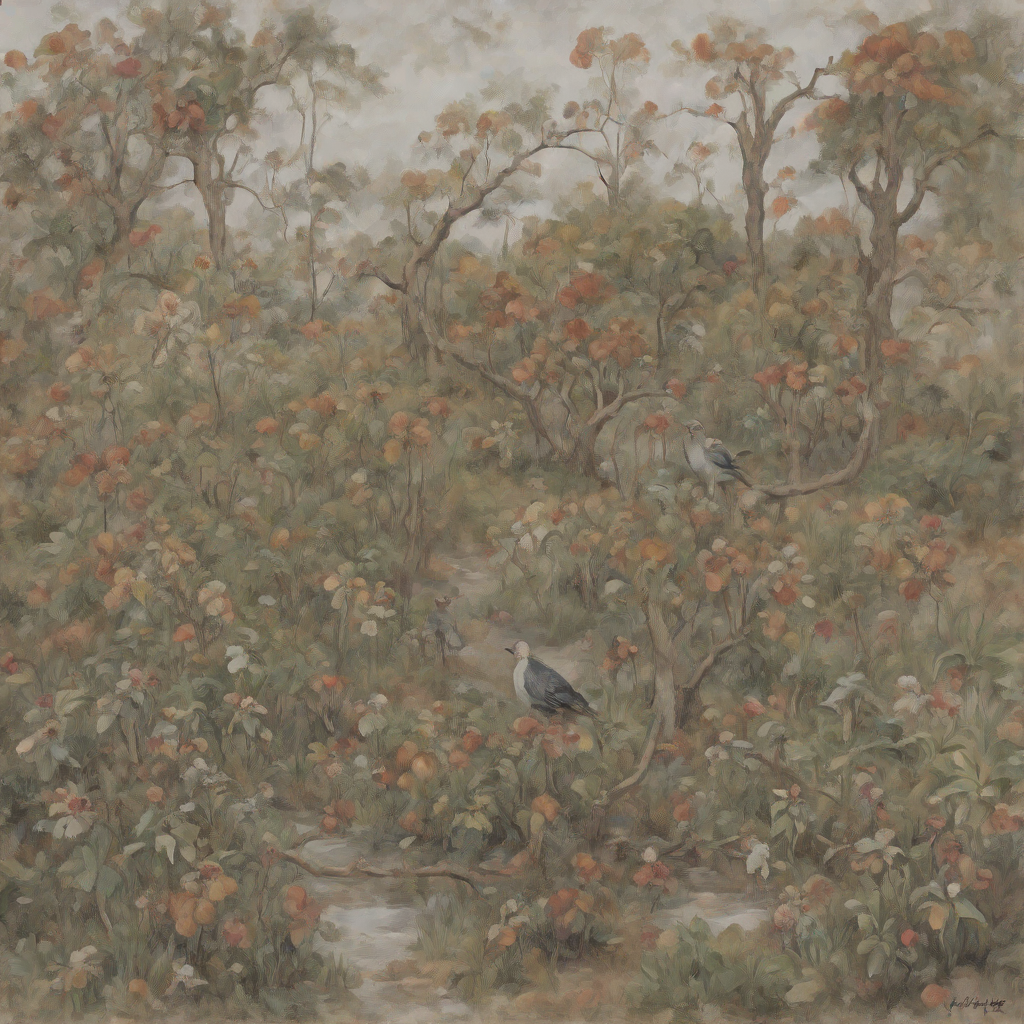

In [6]:
display(imageListOne[0])

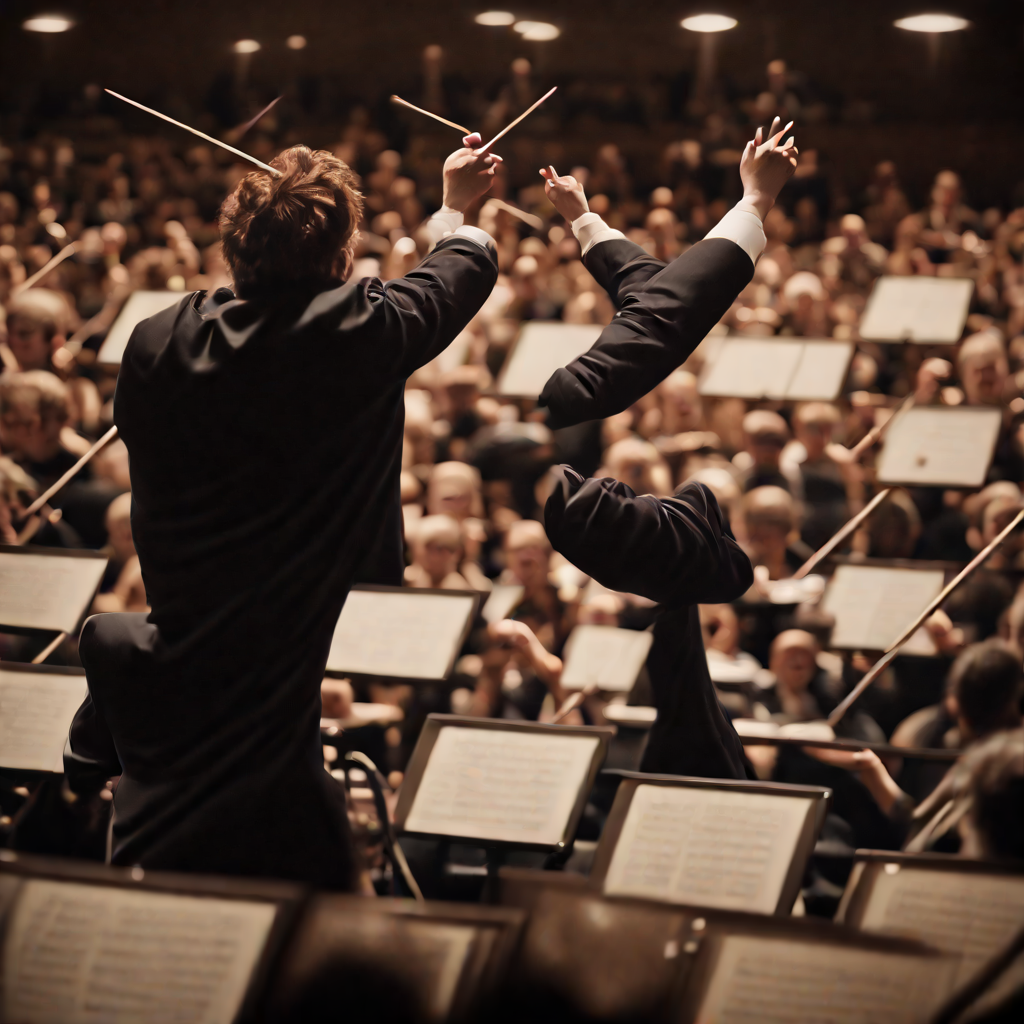

In [7]:
display(imageListTwo[0])

In [8]:
#display(imageListTwo[0].resize((1024, 1024)))

In [9]:
print('timeList: ', len(timeList))
print('imageListOne: ', len(imageListOne))
print('imageListTwo: ', len(imageListTwo))

timeList:  200
imageListOne:  200
imageListTwo:  200


# Save imageList as a pickle file

In [10]:
with open('/kaggle/working/sdxl_turbo_imageListOne.pkl', 'wb') as f:
    pickle.dump(imageListOne, f)

In [11]:
with open('/kaggle/working/sdxl_turbo_imageListTwo.pkl', 'wb') as f:
    pickle.dump(imageListTwo, f)

# Save timeList as a pickle file

In [12]:
with open('/kaggle/working/sdxl_timeList.pkl', 'wb') as f:
    pickle.dump(timeList, f)

In [13]:
#references:
#https://huggingface.co/stabilityai/sdxl-turbo